In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.base import clone
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, KFold, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import (AdaBoostClassifier, GradientBoostingClassifier,
                              RandomForestClassifier, ExtraTreesClassifier)
%matplotlib inline

In [2]:
data0 = pd.read_csv('./data/train/train0.csv', sep=",")
data1 = pd.read_csv('./data/train/train1.csv', sep=",")
data2 = pd.read_csv('./data/train/train2.csv', sep=",")
data3 = pd.read_csv('./data/train/train3.csv', sep=",")
data4 = pd.read_csv('./data/train/train4.csv', sep=",")

In [3]:
print(data0.shape, data1.shape, data2.shape, data3.shape,data4.shape)

(284, 7) (284, 13) (284, 8) (284, 7) (284, 5)


In [4]:
data0.head()

,ID,Category,radius_mean,radius_std,radius_max,texture_mean,texture_std
0,857810,0,13.05,19.31,82.61,527.2,0.08060
1,84300903,1,19.69,21.25,130.00,1203.0,0.10960
2,89122,1,19.40,18.18,127.20,1145.0,0.10370
3,8810703,1,28.11,18.47,188.50,2499.0,0.11420
4,904969,0,12.34,14.95,78.29,469.1,0.08682


In [5]:
data1.head()

,IT,Category,area_std,area_max,smoothness_mean,smoothness_std,smoothness_max,compactness_mean,compactness_std,compactness_max,concavity_mean,concavity_std,concavity_max
0,857810,0,0.4040,1.2140,2.595,32.96,0.007491,0.008593,0.000692,0.004167,0.02190,0.002990,14.23
1,84300903,1,0.7456,0.7869,4.585,94.03,0.006150,0.040060,0.038320,0.020580,0.02250,0.004571,23.57
2,89122,1,0.4709,0.9951,2.903,53.16,0.005654,0.021990,0.030590,0.014990,0.01623,0.001965,23.79
3,8810703,1,2.8730,1.4760,21.980,525.60,0.013450,0.027720,0.063890,0.014070,0.04783,0.004476,28.11
4,904969,0,0.3833,0.9078,2.602,30.15,0.007702,0.008491,0.013070,0.010300,0.02970,0.001432,13.18


In [6]:
data2.head()

,ID,Category,concave_points_mean,concave_points_std,concave_points_max,symmetry_mean,symmetry_std,symmetry_max
0,857810,0,22.25,90.24,624.1,0.1021,0.06191,0.001845
1,84300903,1,25.53,152.50,1709.0,0.1444,0.42450,0.450400
2,89122,1,28.65,152.40,1628.0,0.1518,0.37490,0.431600
3,8810703,1,18.47,188.50,2499.0,0.1142,0.15160,0.320100
4,904969,0,16.85,84.11,533.1,0.1048,0.06744,0.049210


In [7]:
data3.head()

,1D,Category,texture_max,perimeter_mean,perimeter_std,perimeter_max,area_mean
0,857810,0,0.03789,0.000692,0.004167,0.1819,0.05501
1,84300903,1,0.15990,0.197400,0.127900,0.2069,0.05999
2,89122,1,0.14420,0.162600,0.094640,0.1893,0.05892
3,8810703,1,0.15160,0.320100,0.159500,0.1648,0.05525
4,904969,0,0.04571,0.021090,0.020540,0.1571,0.05708


In [8]:
data4.head()

,ID,Category,fractal_dimension_mean,fractal_dimension_std,fractal_dimension_max
0,857810,0,0.01111,0.2439,0.06289
1,84300903,1,0.24300,0.3613,0.08758
2,89122,1,0.22520,0.3590,0.07787
3,8810703,1,0.15950,0.1648,0.05525
4,904969,0,0.04793,0.2298,0.05974


In [9]:
data0 = data0.set_index('ID')
data1 = data1.set_index('IT')
data2 = data2.set_index('ID')
data3 = data3.set_index('1D')
data4 = data4.set_index('ID')

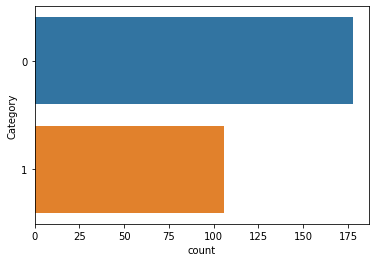

In [10]:
y = data0['Category']
ax = sns.countplot(y=y)

In [11]:
data0 = data0.drop(columns='Category')
data1 = data1.drop(columns='Category')
data2 = data2.drop(columns='Category')
data3 = data3.drop(columns='Category')
data4 = data4.drop(columns='Category')

In [12]:
data = data0.join(data1, rsuffix='d1_').join(data2, rsuffix='d2_').join(data3, rsuffix='d3_').join(data4, rsuffix='d4_')
data.head()

,radius_mean,radius_std,radius_max,texture_mean,texture_std,area_std,area_max,smoothness_mean,smoothness_std,smoothness_max,...,symmetry_std,symmetry_max,texture_max,perimeter_mean,perimeter_std,perimeter_max,area_mean,fractal_dimension_mean,fractal_dimension_std,fractal_dimension_max
ID,,,,,,,,,,,,,,,,,,,,,
857810,13.05,19.31,82.61,527.2,0.08060,0.4040,1.2140,2.595,32.96,0.007491,...,0.06191,0.001845,0.03789,0.000692,0.004167,0.1819,0.05501,0.01111,0.2439,0.06289
84300903,19.69,21.25,130.00,1203.0,0.10960,0.7456,0.7869,4.585,94.03,0.006150,...,0.42450,0.450400,0.15990,0.197400,0.127900,0.2069,0.05999,0.24300,0.3613,0.08758
89122,19.40,18.18,127.20,1145.0,0.10370,0.4709,0.9951,2.903,53.16,0.005654,...,0.37490,0.431600,0.14420,0.162600,0.094640,0.1893,0.05892,0.22520,0.3590,0.07787
8810703,28.11,18.47,188.50,2499.0,0.11420,2.8730,1.4760,21.980,525.60,0.013450,...,0.15160,0.320100,0.15160,0.320100,0.159500,0.1648,0.05525,0.15950,0.1648,0.05525
904969,12.34,14.95,78.29,469.1,0.08682,0.3833,0.9078,2.602,30.15,0.007702,...,0.06744,0.049210,0.04571,0.021090,0.020540,0.1571,0.05708,0.04793,0.2298,0.05974


<AxesSubplot:>

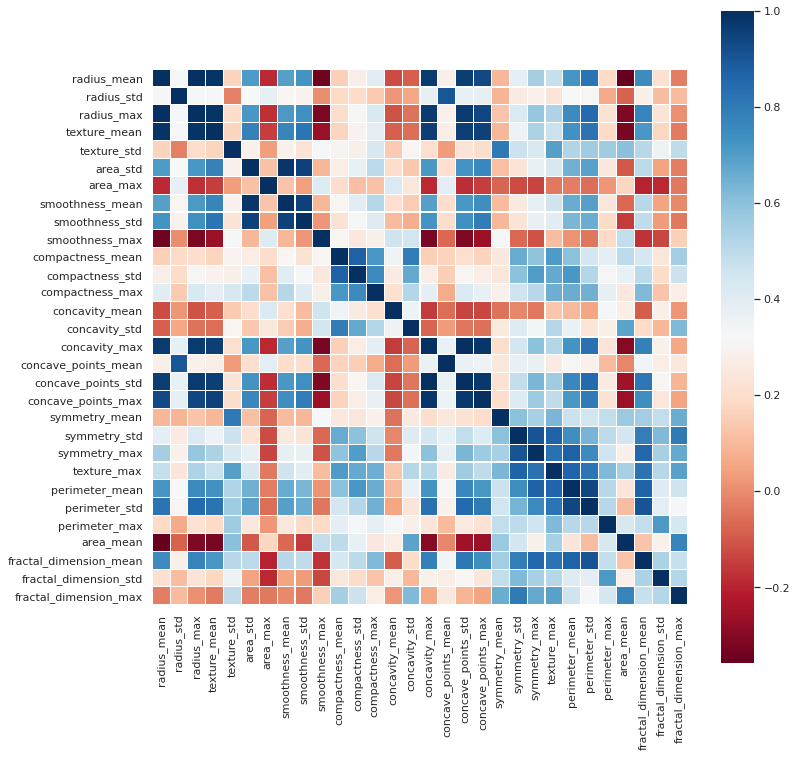

In [13]:
sns.set(font_scale=1)
plt.subplots(figsize=(12, 12))
sns.heatmap(data.corr(), square=True,
              annot=False, fmt=".1f", linewidths=0.1, cmap="RdBu")

In [14]:
data = data.drop(['radius_max','texture_mean','area_max','smoothness_mean','compactness_max', 'smoothness_std', 'concave_points_std','concave_points_max','perimeter_std', 'symmetry_max'], axis=1)

<AxesSubplot:>

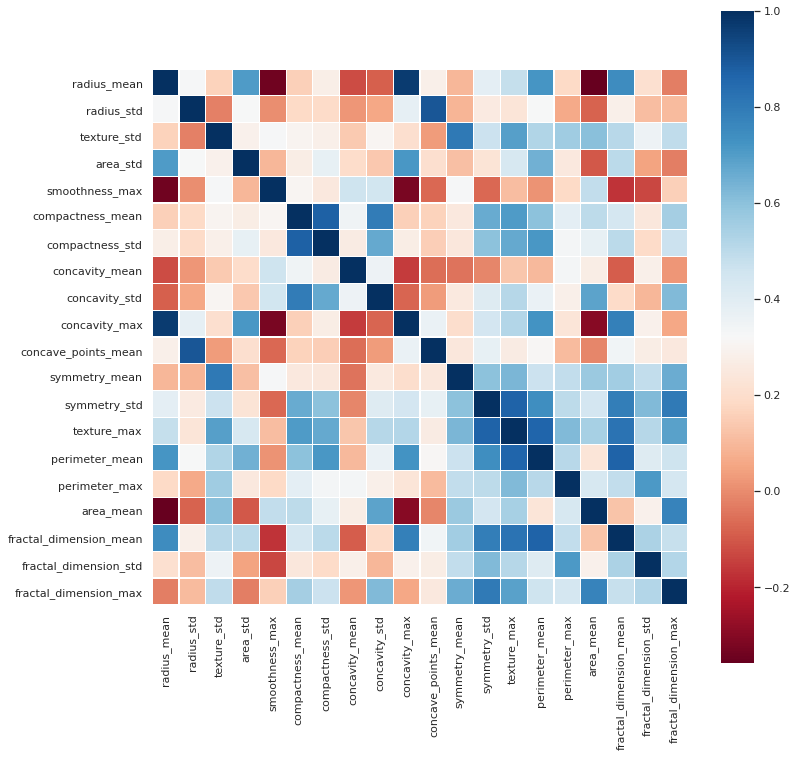

In [15]:
sns.set(font_scale=1)
plt.subplots(figsize=(12, 12))
sns.heatmap(data.corr(), square=True,
              annot=False, fmt=".1f", linewidths=0.1, cmap="RdBu")

In [16]:
data.shape

(284, 20)

In [17]:
X_train, X_test, y_train, y_test = train_test_split(data, y, random_state=42, test_size=0.2)

In [18]:
test0 = pd.read_csv('./data/test/test0.csv', sep=",")
test1 = pd.read_csv('./data/test/test1.csv', sep=",")
test2 = pd.read_csv('./data/test/test2.csv', sep=",")
test3 = pd.read_csv('./data/test/test3.csv', sep=",")
test4 = pd.read_csv('./data/test/test4.csv', sep=",")
test0.head()

,ID,radius_mean,radius_std,radius_max,texture_mean,texture_std
0,8915,14.960,19.10,97.03,687.3,0.08992
1,91376702,17.850,13.23,114.60,992.1,0.07838
2,8710441,9.731,15.34,63.78,300.2,0.10720
3,871641,11.080,14.71,70.21,372.7,0.10060
4,873592,27.220,21.87,182.10,2250.0,0.10940


In [19]:
idcol = test0['ID']
test0 = test0.set_index('ID')
test1 = test1.set_index('ID')
test2 = test2.set_index('ID')
test3 = test3.set_index('ID')
test4 = test4.set_index('ID')
test = test0.join(test3, rsuffix='d1_').join(test2, rsuffix='d2_').join(test4, rsuffix='d3_').join(test1, rsuffix='d4_')

test = test.drop(['radius_max','texture_mean','area_max','smoothness_mean','compactness_max', 'smoothness_std', 'conc_points_std','conc_points_max','p_std', 'symmetry_max'], axis=1)
test.head()

,radius_mean,radius_std,texture_std,area_std,smoothness_max,compactness_mean,compactness_std,concavity_mean,concavity_std,concavity_max,conc_points_mean,symmetry_mean,symmetry_std,texture_max,p_mean,p_max,area_mean,fractal_dimension_mean,fractal_dimension_std,fractal_dimension_max
ID,,,,,,,,,,,,,,,,,,,,
8915,14.960,19.10,0.08992,0.2877,0.005332,0.021150,0.01536,0.01522,0.002815,16.25,26.19,0.13130,0.30300,0.09823,0.05940,0.1879,0.05852,0.14890,0.2962,0.08472
91376702,17.850,13.23,0.07838,0.4834,0.004369,0.008274,0.01153,0.01302,0.001309,19.82,18.42,0.09862,0.09976,0.06217,0.04445,0.1220,0.05243,0.08341,0.1783,0.05871
8710441,9.731,15.34,0.10720,0.8245,0.010970,0.095860,0.39600,0.03546,0.029840,11.02,19.49,0.12920,0.27720,0.15990,0.41080,0.2548,0.09296,0.15710,0.3108,0.12590
871641,11.080,14.71,0.10060,0.2073,0.014960,0.021210,0.01453,0.03082,0.004785,11.35,16.82,0.12160,0.08240,0.05743,0.02363,0.1566,0.06669,0.04306,0.1902,0.07313
873592,27.220,21.87,0.10940,0.8361,0.004631,0.025370,0.03109,0.01575,0.002747,33.12,32.85,0.14720,0.40340,0.19140,0.28710,0.1800,0.05770,0.26880,0.2856,0.08082


In [21]:
def compute_metric(clf, X_train, y_train, X_test, y_test):
    clf.fit(X_train, y_train)
    y_test_pred = clf.predict(X_test)
    return np.round(f1_score(y_test, y_test_pred, average='macro'), 6)

In [22]:
def generate_metafeatures(classifiers, X_train, X_test, y_train, cv):
    """
    Generates metafeatures using a list of classifiers.
    
    :arg classifiers: list of scikit-learn classifiers
    :args X_train, y_train: training set
    :arg X_test: testing set
    :arg cv: cross-validation folding
    """
    features = [
        compute_meta_feature(clf, X_train, X_test, y_train, cv)
        for clf in classifiers
    ]
    
    stacked_features_train = np.hstack([
        features_train for features_train, features_test in features
    ])

    stacked_features_test = np.hstack([
        features_test for features_train, features_test in features
    ])
    
    return stacked_features_train, stacked_features_test

In [25]:
scaler = StandardScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train))
X_test = pd.DataFrame(scaler.transform(X_test))

def compute_meta_feature(clf, X_train, X_test, y_train, cv):
    """    Эта функция подсчитывает признаки для мета-классификатора.
    Они являются вероятностями классов при решении задачи многоклассовой классификации.
    :arg clf: классификатор
    :args X_train, y_train: обучающая выборка
    :arg X_test: признаки тестовой выборки
    :arg cv: класс, генерирующий фолды (KFold)
    :returns X_meta_train,X_meta_test: новые признаки для обучающей и тестовой выборок
    """
    n_classes = len(np.unique(y_train))
    X_meta_train = np.zeros((len(X_train), n_classes), dtype=np.float32)
    X_meta_test = np.zeros((len(X_test), n_classes), dtype=np.float32)
    for train_fold_index, predict_fold_index in cv.split(X_train, y_train):
        X_fold_train, X_fold_predict = X_train.iloc[train_fold_index], X_train.iloc[predict_fold_index]
        y_fold_train = y_train.iloc[train_fold_index]

        folded_clf = clone(clf)
        folded_clf.fit(X_fold_train, y_fold_train)

        X_meta_train[predict_fold_index] = folded_clf.predict_proba(X_fold_predict)
        X_meta_test += folded_clf.predict_proba(X_test)
    
    X_meta_test = X_meta_test / cv.n_splits
    
    return X_meta_train, X_meta_test


cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

stacked_features_train, stacked_features_test = generate_metafeatures([
    RandomForestClassifier(n_estimators=300, n_jobs=-1, random_state=42),
    ExtraTreesClassifier(n_estimators=300, n_jobs=-1, random_state=42),
], X_train, X_test, y_train, cv)

np.random.seed(42)
clf = RandomForestClassifier(random_state=42)
clf.fit(stacked_features_train, y_train)
y_test_pred = clf.predict(stacked_features_test)
print(np.round(f1_score(y_test, y_test_pred, average='macro'), 6))

0.980513


In [27]:
def compute_meta_feature(clf, X_train, X_test, y_train, cv):
    """    Эта функция подсчитывает признаки для мета-классификатора.
    Они являются вероятностями классов при решении задачи многоклассовой классификации.
    :arg clf: классификатор
    :args X_train, y_train: обучающая выборка
    :arg X_test: признаки тестовой выборки
    :arg cv: класс, генерирующий фолды (KFold)
    :returns X_meta_train,X_meta_test: новые признаки для обучающей и тестовой выборок
    """
    n_classes = len(np.unique(y_train))
    X_meta_train = np.zeros((len(X_train), n_classes), dtype=np.float32)
    X_meta_test = np.zeros((len(X_test), n_classes), dtype=np.float32)
    for train_fold_index, predict_fold_index in cv.split(X_train, y_train):
        X_fold_train, X_fold_predict = X_train.iloc[train_fold_index], X_train.iloc[predict_fold_index]
        y_fold_train = y_train.iloc[train_fold_index]

        folded_clf = clone(clf)
        folded_clf.fit(X_fold_train, y_fold_train)

        X_meta_train[predict_fold_index] = folded_clf.predict_proba(X_fold_predict)
        X_meta_test += folded_clf.predict_proba(X_test)
    
    X_meta_test = X_meta_test / cv.n_splits
    
    return X_meta_train, X_meta_test

scaler = StandardScaler()
X_train = pd.DataFrame(scaler.fit_transform(data))
X_test = pd.DataFrame(scaler.transform(test))

cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

stacked_features_train, stacked_features_test = generate_metafeatures([
    RandomForestClassifier(n_estimators=300, n_jobs=-1, random_state=42),
    ExtraTreesClassifier(n_estimators=300, n_jobs=-1, random_state=42),
], data, test, y, cv)

np.random.seed(42)
clf = RandomForestClassifier(random_state=42)
clf.fit(stacked_features_train, y)
y_test_pred = clf.predict(stacked_features_test)
print(y_test_pred)
#print(np.round(f1_score(y_test, y_test_pred, average='macro'), 6))

[0 1 0 0 1 0 0 1 0 1 0 1 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0 1 1 0 1 1 0 0 1 0 0
 1 0 0 0 0 1 0 0 1 1 0 1 0 1 1 1 1 0 1 1 0 0 0 0 0 1 1 0 0 0 1 1 1 0 0 1 0
 0 0 1 1 0 1 0 1 1 0 1 0 1 0 0 0 0 0 0 1 0 1 1 0 1 1 0 1 1 0 0 0 0 0 1 1 1
 1 0 1 0 0 1 1 0 0 0 0 1 0 0 0 0 0 1 0 0 1 0 1 0 0 0 0 0 0 1 0 1 0 1 0 0 0
 0 0 1 0 1 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0 1 0 0 0 1 1 0 0 0 0 0 1 0 1 0 1 1
 1 0 0 0 0 1 1 1 1 0 1 0 0 0 1 0 1 0 1 1 0 0 0 0 0 1 0 0 0 0 1 1 0 0 0 0 1
 0 1 0 0 1 1 0 0 0 0 1 0 0 0 1 0 0 0 1 0 1 0 1 1 1 0 0 1 0 1 0 0 0 0 0 0 0
 0 0 0 1 1 0 0 0 0 1 0 1 0 0 0 1 0 0 1 0 1 0 0 0 0 1]


In [28]:
output = pd.DataFrame(idcol)
output['Category'] = y_test_pred
print(output)
output.to_csv('./data/submission_sample.csv', index=False, sep=',', compression=None) 

           ID  Category
0        8915         0
1    91376702         1
2     8710441         0
3      871641         0
4      873592         1
..        ...       ...
280    911391         0
281    874839         0
282   9112594         0
283    911673         0
284    865423         1

[285 rows x 2 columns]
